In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Read Data

In [2]:
df=pd.read_csv (r'/kaggle/input/fraud-detection-transactions-dataset/synthetic_fraud_dataset.csv')
df.head()

Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  ...  Daily_Transaction_Count  \
0            Travel                0  ...                        7   
1          Clothing                0  ...                       13   
2       Restaurants                0  ...                       14   
3          Clothing                0  ...                        8   
4       Electronics                0  ...                       14   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d   Card_Type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

  Card_Age  Transaction_Distance  Authentication_Method Risk_Score  \
0       65                883.17              Biometric     0.8494   
1      186               2203.36               Password     0.0959   
2      226               1909.29              Biometric     0.8400   
3       76               1311.86                    OTP     0.7935   
4      140                966.98               Password     0.3819   

   Is_Weekend  Fraud_Label  
0           0            0  
1           0            1  
2           0            1  
3           0            1  
4           1            1  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

# Checking Null Values

In [4]:
df.isna().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

# Visualization

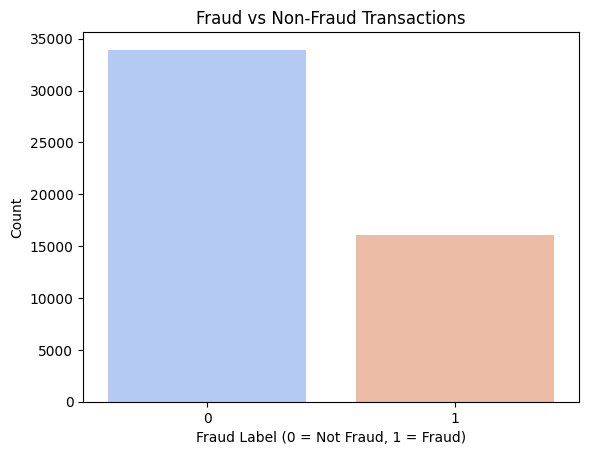

In [5]:
sns.countplot(x=df['Fraud_Label'], palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Fraud Label (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


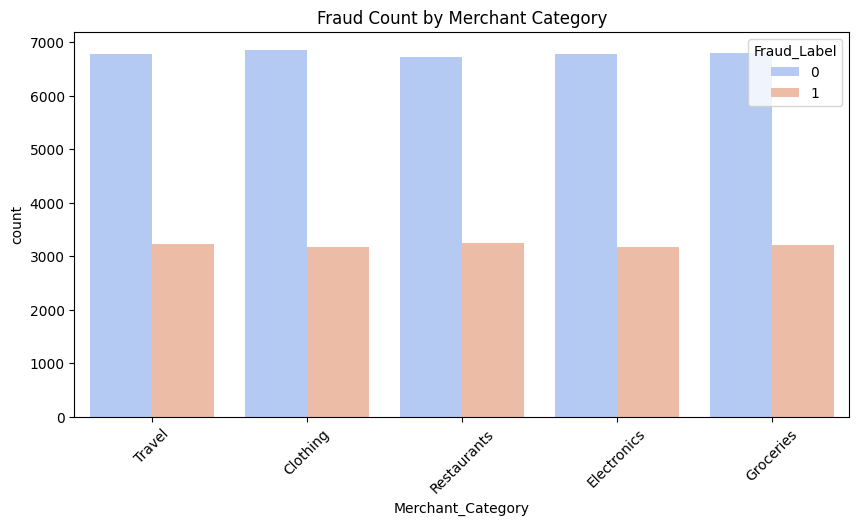

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='Merchant_Category', hue='Fraud_Label', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Fraud Count by Merchant Category")
plt.show()


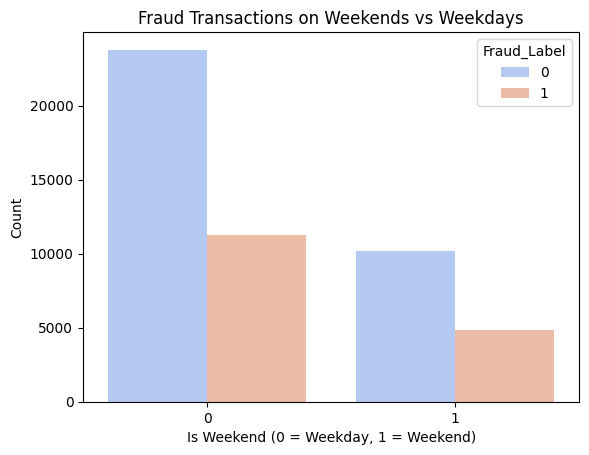

In [7]:
sns.countplot(x=df['Is_Weekend'], hue=df['Fraud_Label'], palette='coolwarm')
plt.title("Fraud Transactions on Weekends vs Weekdays")
plt.xlabel("Is Weekend (0 = Weekday, 1 = Weekend)")
plt.ylabel("Count")
plt.show()


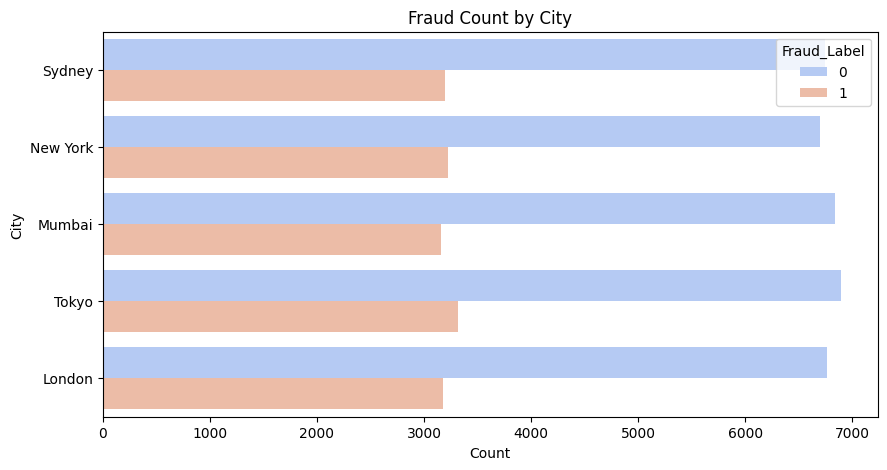

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(y=df['Location'], hue=df['Fraud_Label'], palette='coolwarm')
plt.title("Fraud Count by City")
plt.xlabel("Count")
plt.ylabel("City")
plt.show()


# Profile Report 

In [9]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Fraud Detection", explorative=True)
profile.to_notebook_iframe()

profile.to_file("Fraud Detection_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Splitting Data 

In [10]:
x=df.drop(['Transaction_ID','User_ID','Fraud_Label'],axis=1)
y=df['Fraud_Label']

# Encoding Categorical Data

In [11]:
le=LabelEncoder()
for cols in x.select_dtypes('object').columns:
    x[cols]=le.fit_transform(x[cols])

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Scaling Numerical Data 

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Evaluating All Models

In [14]:
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),  
    'NaiveBayes': GaussianNB(),

}

In [15]:
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}


for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

 
    accuracy = accuracy_score(y_test, obj_pred>0.5,)
    precision = precision_score(y_test, obj_pred>0.5,average='weighted')
    recall = recall_score(y_test, obj_pred>0.5,average='weighted')
    f1 = f1_score(y_test, obj_pred>0.5,average='weighted')

  
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)


results_df = pd.DataFrame(results)


print(results_df)

                Model  Accuracy  Precision  Recall  F1-Score
0  LogisticRegression    0.8047   0.800912  0.8047  0.802032
1        DecisionTree    1.0000   1.000000  1.0000  1.000000
2        RandomForest    0.9999   0.999900  0.9999  0.999900
3                 KNN    0.8242   0.822777  0.8242  0.815252
4                 SVM    0.9797   0.979820  0.9797  0.979737
5          NaiveBayes    0.8912   0.890159  0.8912  0.890401


# Grid Search for NaiveBayes

In [16]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0],
    'binarize': [0.0, 0.5, 1.0, 1.5, 2.0]
}

grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)


print(classification_report(y_test, y_pred))

Best parameters found:  {'alpha': 0.1, 'binarize': 1.0}
Best Accuracy: 0.953425
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      6812
           1       0.86      1.00      0.93      3188

    accuracy                           0.95     10000
   macro avg       0.93      0.96      0.94     10000
weighted avg       0.96      0.95      0.95     10000



# Confusion Matrix

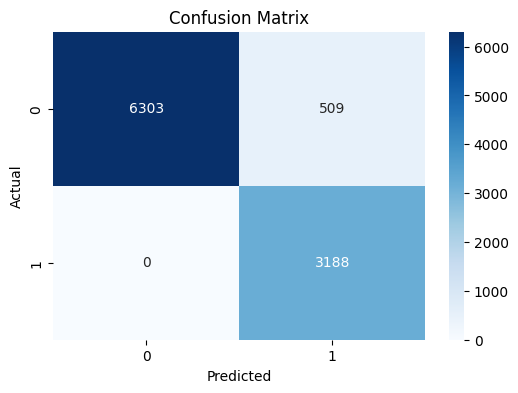

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()